In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
from custom_qiskit_v3_2.datageneration import Toy2DLinearLoader, DataScaler, DataMultiScaler
from custom_qiskit_v3_2.classifier import BinarySVM, Kernel
import numpy as np 
from matplotlib import pyplot as plt

# Is reduction of b critical?
# lifted from https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2004-11.pdf<br>
# said in classifying the MNIST data with Gaussian kernels, the value k = 10 proved to be a very good one justifying all the reasons for its introduction (fast learning, small number of support vectors and good generalization).

# $\frac{1}{2}||w||^2 \quad V.S. \quad \frac{1}{2}||w||^2+\frac{k}{2}b^2$

In [3]:
# set hyperparams
C = None # infinite
kernel = Kernel('linear')
k = 1 # hyperparam for reduced svm
w = (1,1)
b = 0

# set svms
svm1 = BinarySVM(kernel, C, mutation='SVM')
svm2 = BinarySVM(kernel, C, mutation='REDUCED_SVM', k=k)
svm3 = BinarySVM(kernel, C, mutation='QASVM')
svm4 = BinarySVM(kernel, C, mutation='REDUCED_QASVM', k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler = DataScaler('standard')

# fit
svm1.fit(X, y)
svm2.fit(X, y)
print(svm1)
print(svm2)


BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 8

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 8



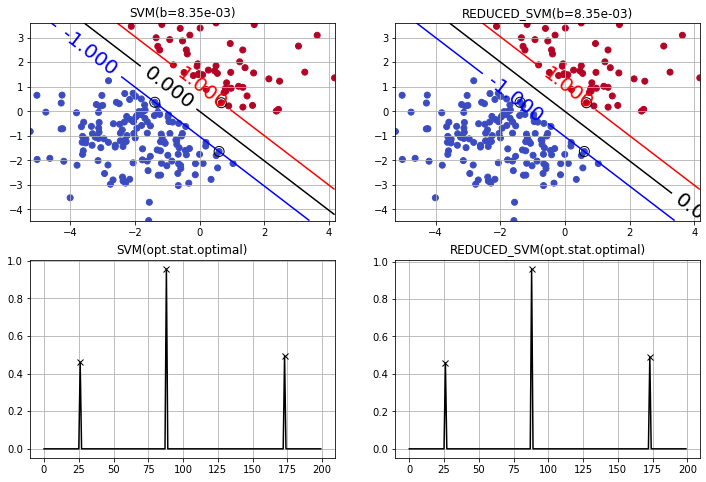

In [4]:
# visualization
fig, axes = plt.subplots(2, 2, figsize=(12,8))
svms = [svm1, svm2]
for i in range(2):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(b={:.2e})'.format(svms[i].mutation, svms[i].b))
    axes[1,i].set_title('{:}(opt.stat.{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/hardmargin_zerobias.png')

# what if b is non-zero?

In [5]:
# set hyperparams
C = None # infinite
kernel = Kernel('linear')
k = 1 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
svm1 = BinarySVM(kernel, C, mutation='SVM')
svm2 = BinarySVM(kernel, C, mutation='REDUCED_SVM', k=k)
svm3 = BinarySVM(kernel, C, mutation='QASVM')
svm4 = BinarySVM(kernel, C, mutation='REDUCED_QASVM', k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler = DataScaler('standard')

# fit
svm1.fit(X, y)
svm2.fit(X, y)
print(svm1)
print(svm2)

BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 9

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 11



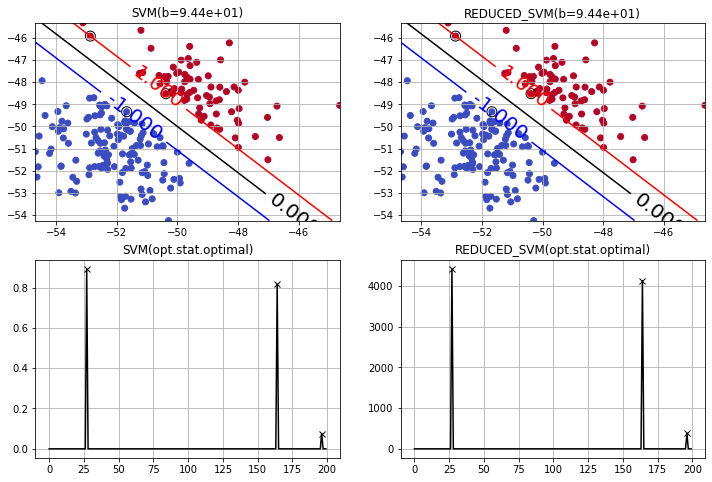

In [6]:
# visualization
fig, axes = plt.subplots(2, 2, figsize=(12,8))
svms = [svm1, svm2]
for i in range(2):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(b={:.2e})'.format(svms[i].mutation, svms[i].b))
    axes[1,i].set_title('{:}(opt.stat.{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/hardmargin_nonzerobias.png')

# what if it is not hardmargin?

In [7]:
# set hyperparams
C = 1 # infinite
kernel = Kernel('linear')
k = 1 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
svm1 = BinarySVM(kernel, C, mutation='SVM')
svm2 = BinarySVM(kernel, C, mutation='REDUCED_SVM', k=k)
svm3 = BinarySVM(kernel, C, mutation='QASVM')
svm4 = BinarySVM(kernel, C, mutation='REDUCED_QASVM', k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler = DataScaler('standard')

# fit
svm1.fit(X, y)
svm2.fit(X, y)
print(svm1)
print(svm2)

BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: 1
	Optimization Status: optimal
	Iterations: 10

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: 1
	Optimization Status: optimal
	Iterations: 11



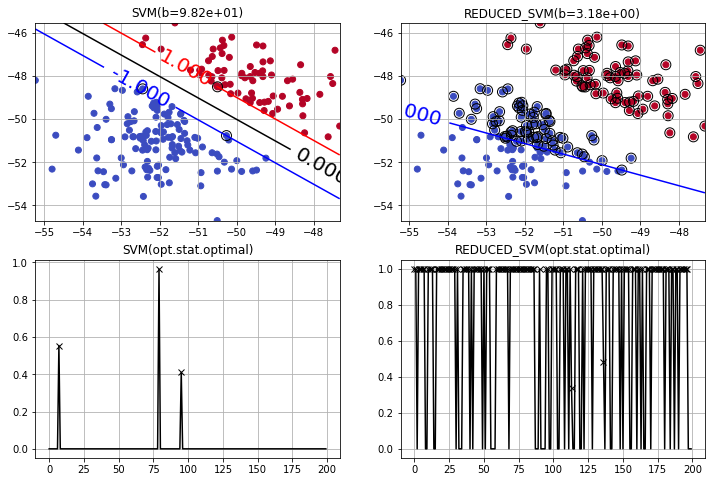

In [8]:
# visualization
fig, axes = plt.subplots(2, 2, figsize=(12,8))
svms = [svm1, svm2]
for i in range(2):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(b={:.2e})'.format(svms[i].mutation, svms[i].b))
    axes[1,i].set_title('{:}(opt.stat.{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/softmargin_nonzerobias.png')

# what if decrease impact of b?

In [9]:
# set hyperparams
C = 1 # infinite
kernel = Kernel('linear')
k = 1e-2 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
svm1 = BinarySVM(kernel, C, mutation='SVM')
svm2 = BinarySVM(kernel, C, mutation='REDUCED_SVM', k=k)
svm3 = BinarySVM(kernel, C, mutation='QASVM')
svm4 = BinarySVM(kernel, C, mutation='REDUCED_QASVM', k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler = DataScaler('standard')

# fit
svm1.fit(X, y)
svm2.fit(X, y)
print(svm1)
print(svm2)

BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: 1
	Optimization Status: optimal
	Iterations: 11

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: 1
	Optimization Status: optimal
	Iterations: 11



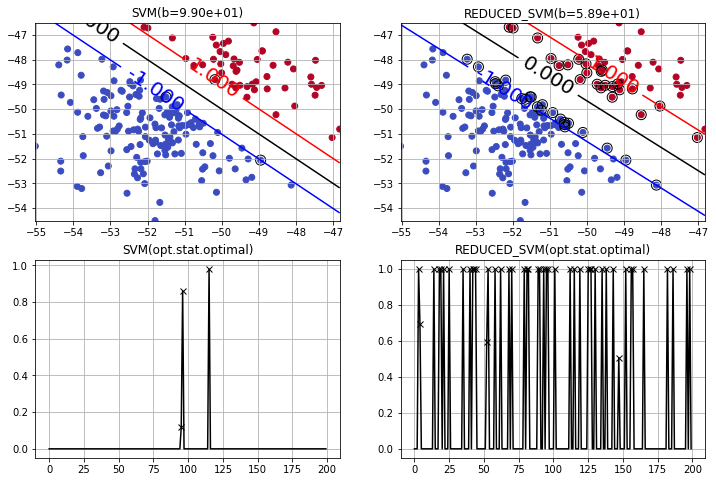

In [10]:
# visualization
fig, axes = plt.subplots(2, 2, figsize=(12,8))
svms = [svm1, svm2]
for i in range(2):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(b={:.2e})'.format(svms[i].mutation, svms[i].b))
    axes[1,i].set_title('{:}(opt.stat.{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/softmargin_nonzerobias_smallk.png')

# what if standardrize data?(standard)

In [11]:
# set hyperparams
C = 1 # infinite
kernel = Kernel('linear')
k = 1e-2 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
svm1 = BinarySVM(kernel, C, mutation='SVM')
svm2 = BinarySVM(kernel, C, mutation='REDUCED_SVM', k=k)
svm3 = BinarySVM(kernel, C, mutation='QASVM')
svm4 = BinarySVM(kernel, C, mutation='REDUCED_QASVM', k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler = DataScaler('standard')

# fit
svm1.fit(datascaler(X), y)
svm2.fit(datascaler(X), y)
print(svm1)
print(svm2)

BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: 1
	Optimization Status: optimal
	Iterations: 15

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: 1
	Optimization Status: optimal
	Iterations: 15



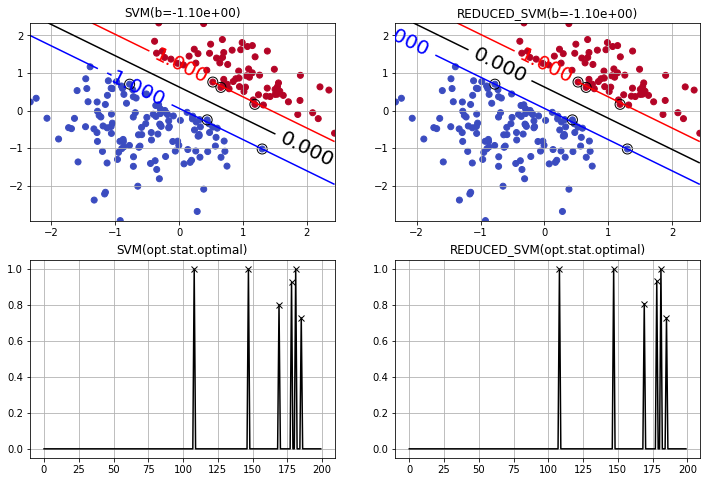

In [12]:
# visualization
fig, axes = plt.subplots(2, 2, figsize=(12,8))
svms = [svm1, svm2]
for i in range(2):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(b={:.2e})'.format(svms[i].mutation, svms[i].b))
    axes[1,i].set_title('{:}(opt.stat.{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/zeromean.png')

# what if standardrize data?(maxabs)

In [13]:
# set hyperparams
C = 1 # infinite
kernel = Kernel('linear')
k = 1e-2 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
svm1 = BinarySVM(kernel, C, mutation='SVM')
svm2 = BinarySVM(kernel, C, mutation='REDUCED_SVM', k=k)
svm3 = BinarySVM(kernel, C, mutation='QASVM')
svm4 = BinarySVM(kernel, C, mutation='REDUCED_QASVM', k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler = DataScaler('minmax', feature_range=(-1,1))

# fit
svm1.fit(datascaler(X), y)
svm2.fit(datascaler(X), y)
print(svm1)
print(svm2)

BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: 1
	Optimization Status: optimal
	Iterations: 11

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: 1
	Optimization Status: optimal
	Iterations: 11



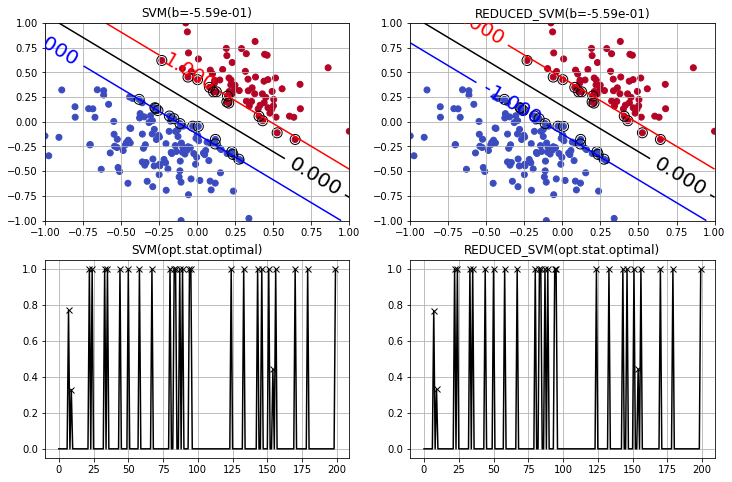

In [14]:
# visualization
fig, axes = plt.subplots(2, 2, figsize=(12,8))
svms = [svm1, svm2]
for i in range(2):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(b={:.2e})'.format(svms[i].mutation, svms[i].b))
    axes[1,i].set_title('{:}(opt.stat.{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/maxabs.png')

# Conclusion
# 1. scale data
# 2. reduced impact of b
# 3. inspect hard margin

In [15]:
# set hyperparams
C = 100 # infinite
kernel = Kernel('linear')
k = 1e-2 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
svm1 = BinarySVM(kernel, C, mutation='SVM')
svm2 = BinarySVM(kernel, C, mutation='REDUCED_SVM', k=k)
svm3 = BinarySVM(kernel, C, mutation='QASVM')
svm4 = BinarySVM(kernel, C, mutation='REDUCED_QASVM', k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler = DataScaler('standard')

# fit
svm1.fit(datascaler(X), y)
svm2.fit(datascaler(X), y)
print(svm1)
print(svm2)

BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 12

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 12



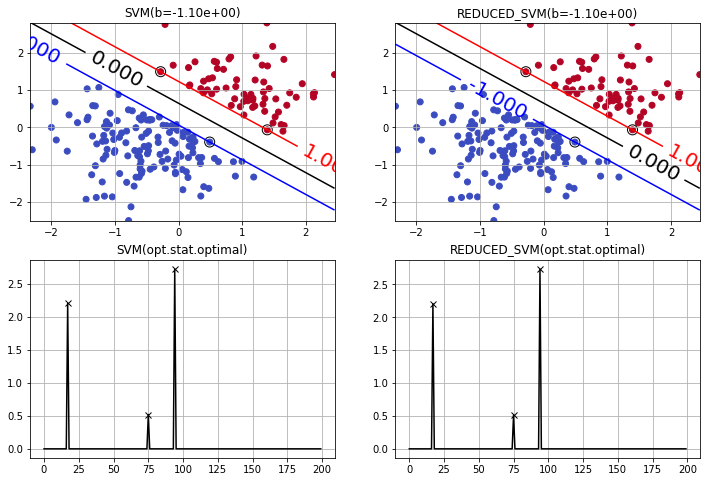

In [16]:
# visualization
fig, axes = plt.subplots(2, 2, figsize=(12,8))
svms = [svm1, svm2]
for i in range(2):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(b={:.2e})'.format(svms[i].mutation, svms[i].b))
    axes[1,i].set_title('{:}(opt.stat.{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/conclustion_on_reduced_svm.png')

# Different Kernels
# 1. Phase Encoding $\left<|x \right> = \frac{1}{\sqrt{N}}\sum_{i=0}^{2^n-1}{e^{jx_i}\left<|i\right>} \Rightarrow k(x, y) = \left[\sum{\cos(x_i-y_i)}\right]^2+\left[\sum{\sin(x_i-y_i)}\right]^2$
# 2. Angle Encoding $\left<|x \right> = \otimes_{i=0}^{2^n-1}\left[\cos(x_i)\left<|0\right>+\sin(x_i)\left<|1\right>\right] \Rightarrow k(x, y) = \prod{\cos(x_i-y_i)^2}$
# 3. Coherent Encoding $\left<|x \right> = \otimes_{i=0}^{2^n-1}\left<|\alpha_{x_i}\right> \Rightarrow k(x, y) = e^{-||x-y||^2}$


In [17]:
# set hyperparams
C = 100 # infinite
k = 1e-2 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
mutation = 'REDUCED_SVM'
svm1 = BinarySVM(Kernel('linear'), C, mutation=mutation, k=k)
svm1_1 = BinarySVM(Kernel('Pow2'), C, mutation=mutation, k=k)
svm2 = BinarySVM(Kernel('RBF', 2), C, mutation=mutation, k=k)
svm3 = BinarySVM(Kernel('Phase'), C, mutation=mutation, k=k)
svm4 = BinarySVM(Kernel('Cosine'), C, mutation=mutation, k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler1 = DataScaler('maxabs')
datascaler2 = DataScaler('standard', with_std=False)
datascaler = DataMultiScaler(datascaler1, datascaler2)

# fit
svm1.fit(datascaler(X), y)
svm1_1.fit(datascaler(X), y)
svm2.fit(datascaler(X), y)
svm3.fit(datascaler(X), y)
svm4.fit(datascaler(X), y)
print(svm1, svm1_1, svm2, svm3, svm4)

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 12
 BinarySVM: (REDUCED_SVM)
	Kernel: Pow2
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 16
 BinarySVM: (REDUCED_SVM)
	Kernel: RBF
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 12
 BinarySVM: (REDUCED_SVM)
	Kernel: Phase
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 13
 BinarySVM: (REDUCED_SVM)
	Kernel: Cosine
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 13



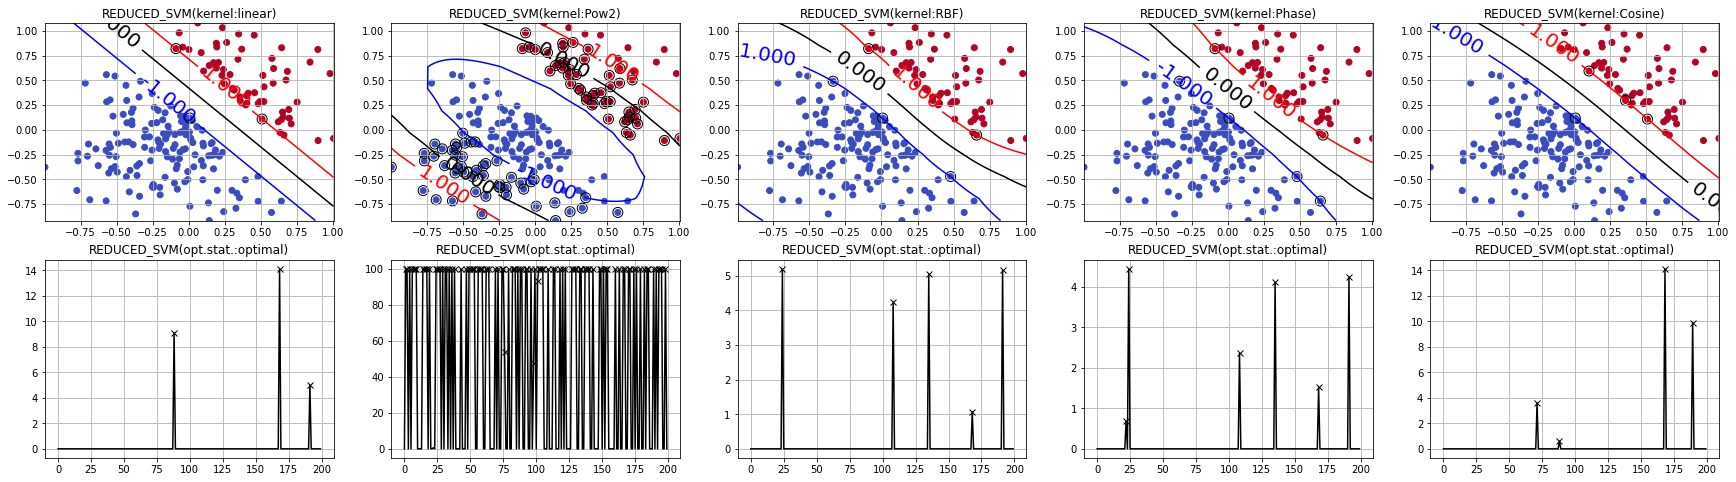

In [18]:
# visualization
fig, axes = plt.subplots(2,5, figsize=(30,8))
svms = [svm1, svm1_1, svm2, svm3, svm4]
for i in range(len(svms)):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(kernel:{:})'.format(svms[i].mutation, svms[i].kernel))
    axes[1,i].set_title('{:}(opt.stat.:{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/reduced_svm_kernels.png')

In [19]:
# set hyperparams
C = 100 # infinite
k = 1e-2 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
mutation = 'REDUCED_QASVM'
svm1 = BinarySVM(Kernel('linear'), C, mutation=mutation, k=k)
svm1_1 = BinarySVM(Kernel('Pow2'), C, mutation=mutation, k=k)
svm2 = BinarySVM(Kernel('RBF', 2), C, mutation=mutation, k=k)
svm3 = BinarySVM(Kernel('Phase'), C, mutation=mutation, k=k)
svm4 = BinarySVM(Kernel('Cosine'), C, mutation=mutation, k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler1 = DataScaler('maxabs')
datascaler2 = DataScaler('standard', with_std=False)
datascaler = DataMultiScaler(datascaler1, datascaler2)

# fit
svm1.fit(datascaler(X), y)
svm1_1.fit(datascaler(X), y)
svm2.fit(datascaler(X), y)
svm3.fit(datascaler(X), y)
svm4.fit(datascaler(X), y)
print(svm1, svm1_1, svm2, svm3, svm4)

BinarySVM: (REDUCED_QASVM)
	Kernel: linear
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 8
 BinarySVM: (REDUCED_QASVM)
	Kernel: Pow2
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 5
 BinarySVM: (REDUCED_QASVM)
	Kernel: RBF
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 7
 BinarySVM: (REDUCED_QASVM)
	Kernel: Phase
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 8
 BinarySVM: (REDUCED_QASVM)
	Kernel: Cosine
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 8



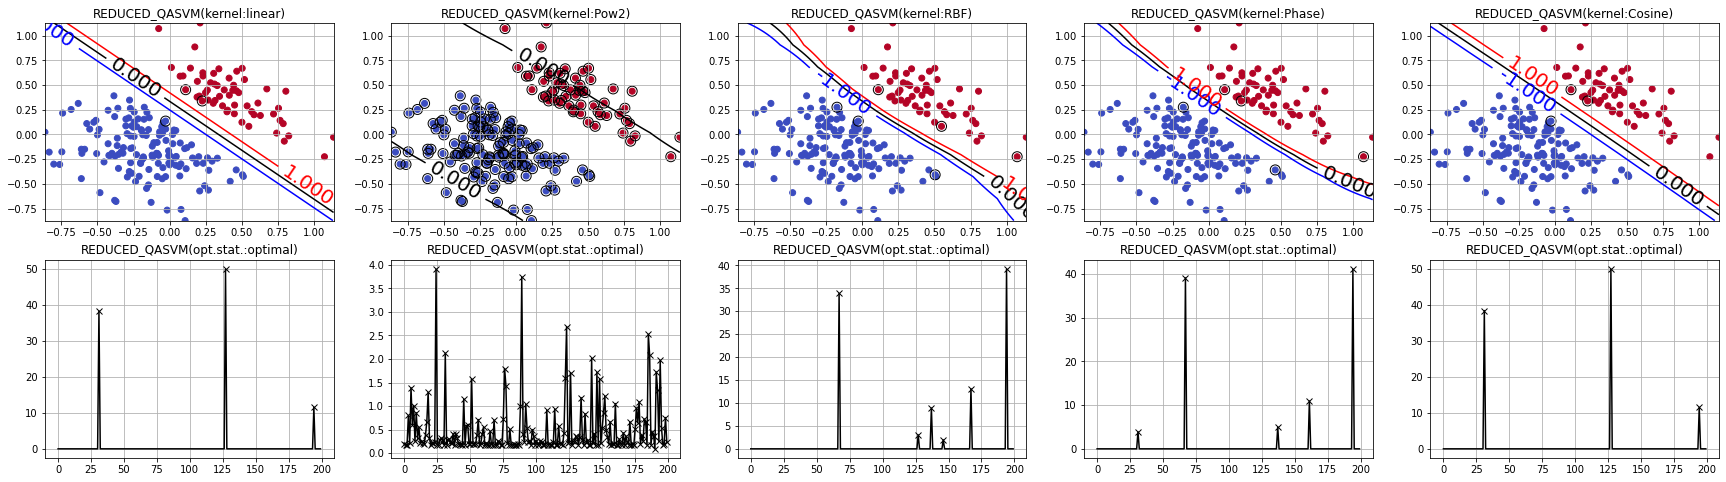

In [20]:
# visualization
fig, axes = plt.subplots(2,5, figsize=(30,8))
svms = [svm1, svm1_1, svm2, svm3, svm4]
for i in range(len(svms)):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(kernel:{:})'.format(svms[i].mutation, svms[i].kernel))
    axes[1,i].set_title('{:}(opt.stat.:{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/reduced_qasvm_kernels.png')

# About primal SVM methods,

In [21]:
# set hyperparams
C = 100 # infinite
k = 1e-2 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
mutation = 'REDUCED_primal_SVM'
svm1 = BinarySVM(Kernel('linear'), C, mutation=mutation, k=k)
svm1_1 = BinarySVM(Kernel('Pow2'), C, mutation=mutation, k=k)
svm2 = BinarySVM(Kernel('RBF', 2), C, mutation=mutation, k=k)
svm3 = BinarySVM(Kernel('Phase'), C, mutation=mutation, k=k)
svm4 = BinarySVM(Kernel('Cosine'), C, mutation=mutation, k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler1 = DataScaler('maxabs')
datascaler2 = DataScaler('standard', with_std=False)
datascaler = DataMultiScaler(datascaler1, datascaler2)

# fit
svm1.fit(datascaler(X), y)
svm1_1.fit(datascaler(X), y)
svm2.fit(datascaler(X), y)
svm3.fit(datascaler(X), y)
svm4.fit(datascaler(X), y)
print(svm1, svm1_1, svm2, svm3, svm4)

BinarySVM: (REDUCED_primal_SVM)
	Kernel: linear
	HyperParameter: 100
	Optimization Status: unknown
	Iterations: 11
 BinarySVM: (REDUCED_primal_SVM)
	Kernel: Pow2
	HyperParameter: 100
	Optimization Status: unknown
	Iterations: 13
 BinarySVM: (REDUCED_primal_SVM)
	Kernel: RBF
	HyperParameter: 100
	Optimization Status: unknown
	Iterations: 18
 BinarySVM: (REDUCED_primal_SVM)
	Kernel: Phase
	HyperParameter: 100
	Optimization Status: unknown
	Iterations: 16
 BinarySVM: (REDUCED_primal_SVM)
	Kernel: Cosine
	HyperParameter: 100
	Optimization Status: unknown
	Iterations: 12



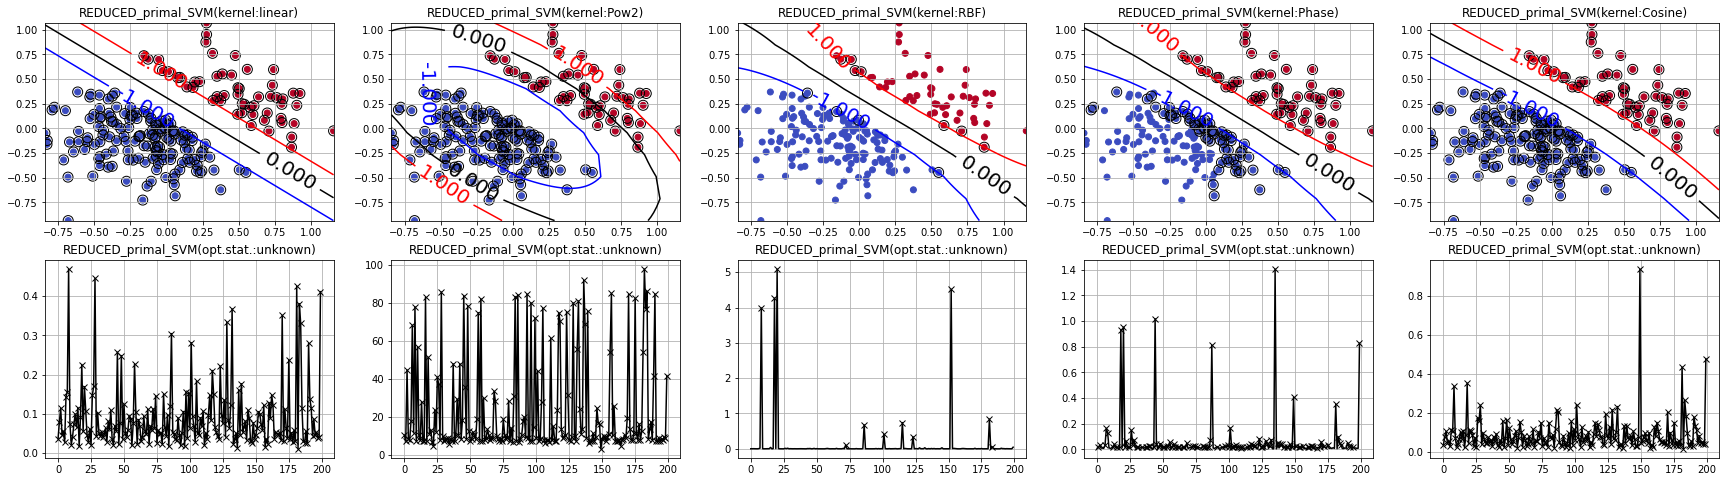

In [22]:
# visualization
fig, axes = plt.subplots(2,5, figsize=(30,8))
svms = [svm1, svm1_1, svm2, svm3, svm4]
for i in range(len(svms)):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(kernel:{:})'.format(svms[i].mutation, svms[i].kernel))
    axes[1,i].set_title('{:}(opt.stat.:{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/reduced_primal_svm_kernels.png')

In [23]:
# set hyperparams
C = 100 # infinite
k = 1e-2 # hyperparam for reduced svm
w = (1,1)
b = 1e2

# set svms
mutation = 'REDUCED_primal_QASVM'
svm1 = BinarySVM(Kernel('linear'), C, mutation=mutation, k=k)
svm1_1 = BinarySVM(Kernel('Pow2'), C, mutation=mutation, k=k)
svm2 = BinarySVM(Kernel('RBF', 2), C, mutation=mutation, k=k)
svm3 = BinarySVM(Kernel('Phase'), C, mutation=mutation, k=k)
svm4 = BinarySVM(Kernel('Cosine'), C, mutation=mutation, k=k)

# load data
dataloader = Toy2DLinearLoader(w, b)
X, y = dataloader(200)
datascaler1 = DataScaler('maxabs')
datascaler2 = DataScaler('standard', with_std=False)
datascaler = DataMultiScaler(datascaler1, datascaler2)

# fit
svm1.fit(datascaler(X), y)
svm1_1.fit(datascaler(X), y)
svm2.fit(datascaler(X), y)
svm3.fit(datascaler(X), y)
svm4.fit(datascaler(X), y)
print(svm1, svm1_1, svm2, svm3, svm4)

BinarySVM: (REDUCED_primal_QASVM)
	Kernel: linear
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 15
 BinarySVM: (REDUCED_primal_QASVM)
	Kernel: Pow2
	HyperParameter: 100
	Optimization Status: unknown
	Iterations: 15
 BinarySVM: (REDUCED_primal_QASVM)
	Kernel: RBF
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 15
 BinarySVM: (REDUCED_primal_QASVM)
	Kernel: Phase
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 14
 BinarySVM: (REDUCED_primal_QASVM)
	Kernel: Cosine
	HyperParameter: 100
	Optimization Status: optimal
	Iterations: 15



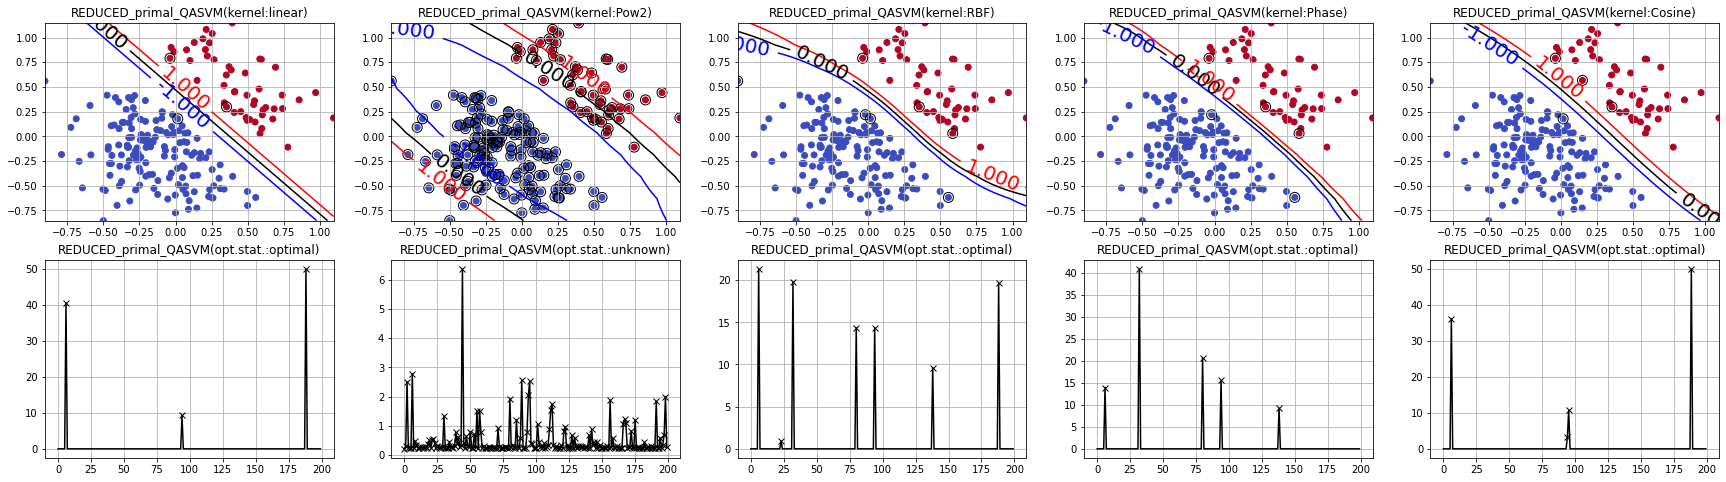

In [24]:
# visualization
fig, axes = plt.subplots(2,5, figsize=(30,8))
svms = [svm1, svm1_1, svm2, svm3, svm4]
for i in range(len(svms)):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(kernel:{:})'.format(svms[i].mutation, svms[i].kernel))
    axes[1,i].set_title('{:}(opt.stat.:{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/reduced_primal_qasvm_kernels.png')